In [1]:
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown, display,HTML,Image
import itertools
from z3 import *

### Puzzle as published 
https://www.janestreet.com/puzzles/number-cross-3-index/

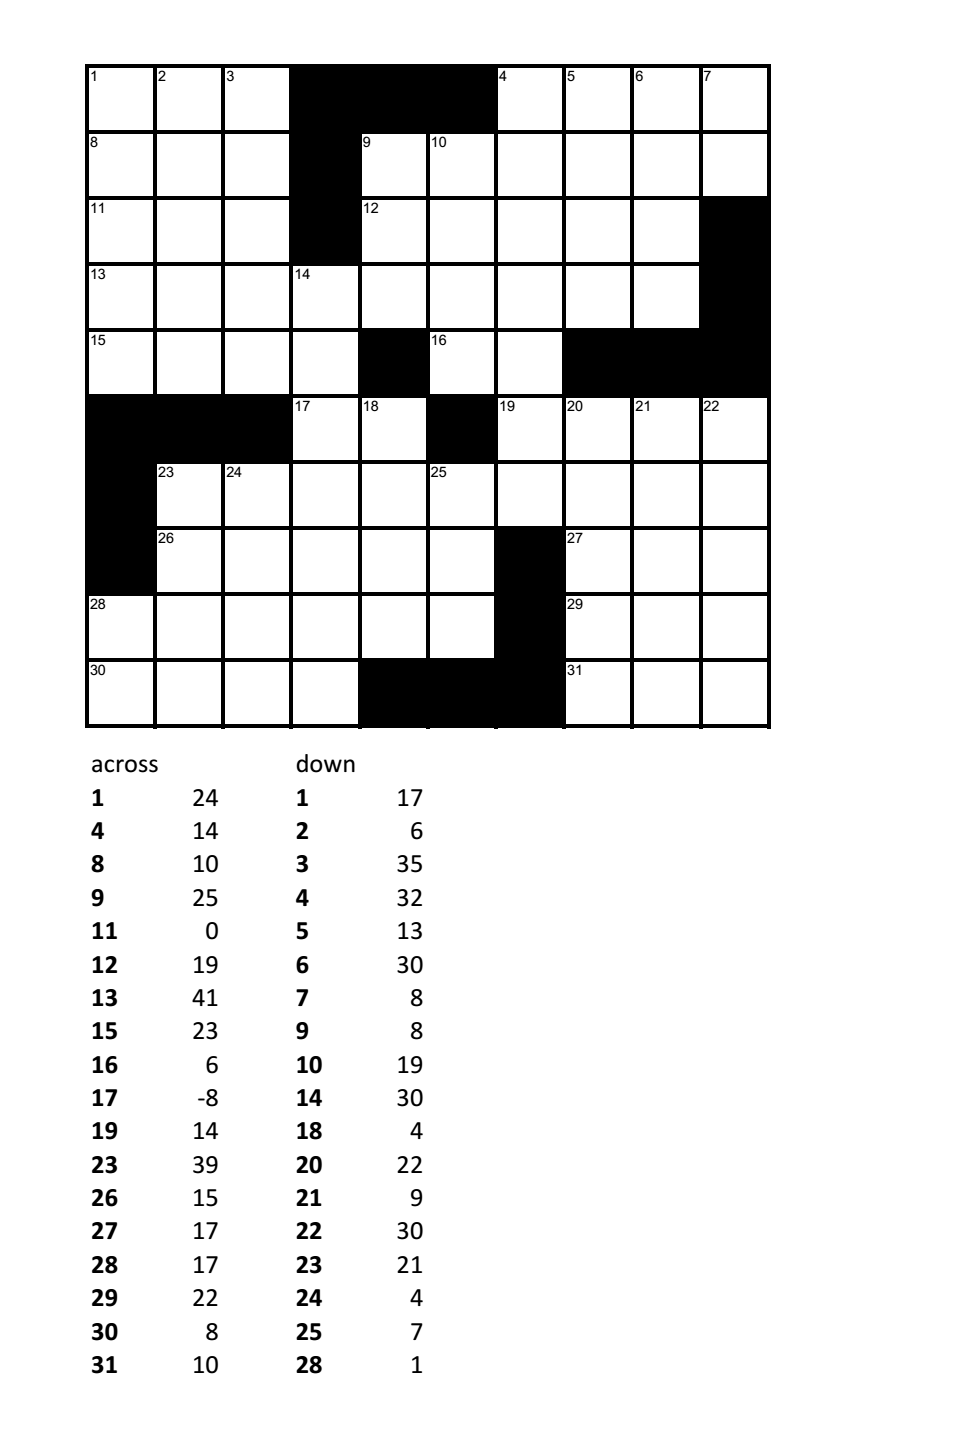

In [2]:
url='https://www.janestreet.com/puzzles/number-cross-3-index/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
display(Markdown('### Puzzle as published \n'+url))
display(Image('https://www.janestreet.com/puzzles/jul16_puzzle.png',width=500))
HTML(str(soup.find_all('div', {'class' :'inner-wrapper'})[1]))

In [3]:
#### set up a nice output grid
fixed= np.zeros((10,10),dtype=int)
fixed[0,3:6] = 1;fixed[1,3] = 1;fixed[2,3] = 1;fixed[2:5,9] = 1;fixed[2,3] = 1;fixed[4,4] = 1
fixed[4,7:10] = 1;fixed[5,0:3] = 1;fixed[5,5] = 1;fixed[6:8,0] = 1;fixed[7:9,6] = 1;fixed[9,4:7] = 1

def print_grid(fixed,solved):
    fig,ax = plt.subplots(1,1,figsize=(4,4))
    ax =sns.heatmap(fixed,annot=solved,cbar=False,cmap="Greys",
                fmt="",linewidths=2,annot_kws={"size":14,"color":"k"},linecolor='k')
    ax.axis("off")
    plt.show()    
    
def find_negs(grid):
    total = 0
    neigh = [(0,-1),(0,1),(1,0),(-1,0)]
    for (i,j),e in np.ndenumerate(grid):
        if e <0:
            total += sum([grid[i+x,j+y] for x,y in neigh if i+x>=0 and i+x <10 and j+y >=0 and j+y <10])
    return total

Solved in 1.3304 seconds. Solution **148**

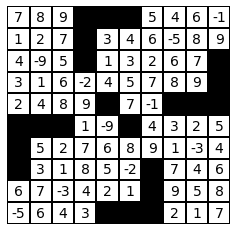

In [4]:
start =time.time()   
# Setup # 9x9 matrix of integer variables and solver #
# 2 lists of variables one for the digit one for negatives
X = np.array(IntVector("x",10*10),dtype=object).reshape((10,10))
Y = np.array(IntVector("y",10*10),dtype=object).reshape((10,10))

s = Tactic("pqffd").solver()

# constraints 
# only one negative number in each row/column
s+=  [PbEq([(Y[i][j] ==-1,1) for j in range(10) if fixed[i,j]==0],1) for i in range(10)]
s+=  [PbEq([(Y[i][j] ==-1,1) for i in range(10) if fixed[i,j]==0],1) for j in range(10)]

# each digit only once in each row/column
for n in range(10):
    s += Distinct([e for (i,j),e in np.ndenumerate(X) if fixed[i,j]==0 and i ==n])
    s += Distinct([e for (i,j),e in np.ndenumerate(X) if fixed[i,j]==0 and j ==n])

# Cell values
s += [And(e > 0, e <= 9) if fixed[i,j] !=1 else e==0 for (i,j),e in np.ndenumerate(X)]
s += [Or(e==1, e==-1) for _,e in np.ndenumerate(Y)]

def across(row,start,length,total):
    clue = [X[row,i]*Y[row,i] for i in range(start,start+length)]
    return  Sum(clue)==total

def down(col,start,length,total):
    clue = [X[i,col]*Y[i,col] for i in range(start,start+length)]    
    return  Sum(clue)==total

s += across(0,0,3,24)  #1
s += across(0,6,4,14)  #4
s += across(1,0,3,10)  #8
s += across(1,4,6,25)  #9
s += across(2,0,3,0)   #11
s += across(2,4,5,19)  #12
s += across(3,0,9,41)  #13
s += across(4,0,4,23)  #15
s += across(4,5,2,6)   #16
s += across(5,3,2,-8)  #17
s += across(5,6,4,14)  #19
s += across(6,1,9,39)  #23
s += across(7,1,5,15)  #26
s += across(7,7,3,17)  #27
s += across(8,0,6,17)  #28
s += across(8,7,3,22)  #29
s += across(9,0,4,8)   #30
s += across(9,7,3,10)  #31

s += down(0,0,5,17)  #1
s += down(1,0,5,6)   #2
s += down(2,0,5,35)  #3
s += down(6,0,7,32)  #4
s += down(7,0,4,13)  #5
s += down(8,0,4,30)  #6
s += down(9,0,2,8)   #7
s += down(4,1,3,8)   #9
s += down(5,1,4,19)  #10
s += down(3,3,7,30)  #14
s += down(4,5,4,4)   #18
s += down(7,5,5,22)  #20
s += down(8,5,5,9)   #21
s += down(9,5,5,30)  #22
s += down(1,6,4,21)  #23
s += down(2,6,4,4)  #24
s += down(5,6,3,7)  #25
s += down(0,8,2,1)   #28   

if s.check() == sat:
    m = s.model()
    evalu = np.vectorize(lambda x:m.evaluate(x).as_long())
    x_result = evalu(X)
    y_result = evalu(Y)
else:
    print("Failed")

display(Markdown(("Solved in {:.4f} seconds. Solution **{:.0f}**".format(time.time()-start,
                                                         find_negs(x_result*y_result)))))
print_grid(fixed,x_result*y_result)

### Solution as published 
https://www.janestreet.com/puzzles/number-cross-3-solution/

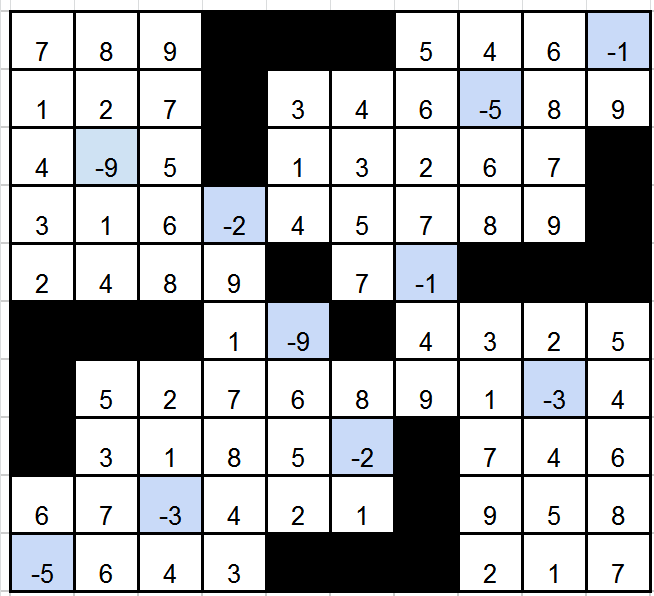

In [5]:
url='https://www.janestreet.com/puzzles/number-cross-3-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
display(Markdown('### Solution as published \n'+url))

display(HTML(str(soup.find_all('div', {'class' :'inner-wrapper'})[1])))
display(Image('https://www.janestreet.com/puzzles/jul16_solution.png',width=300))